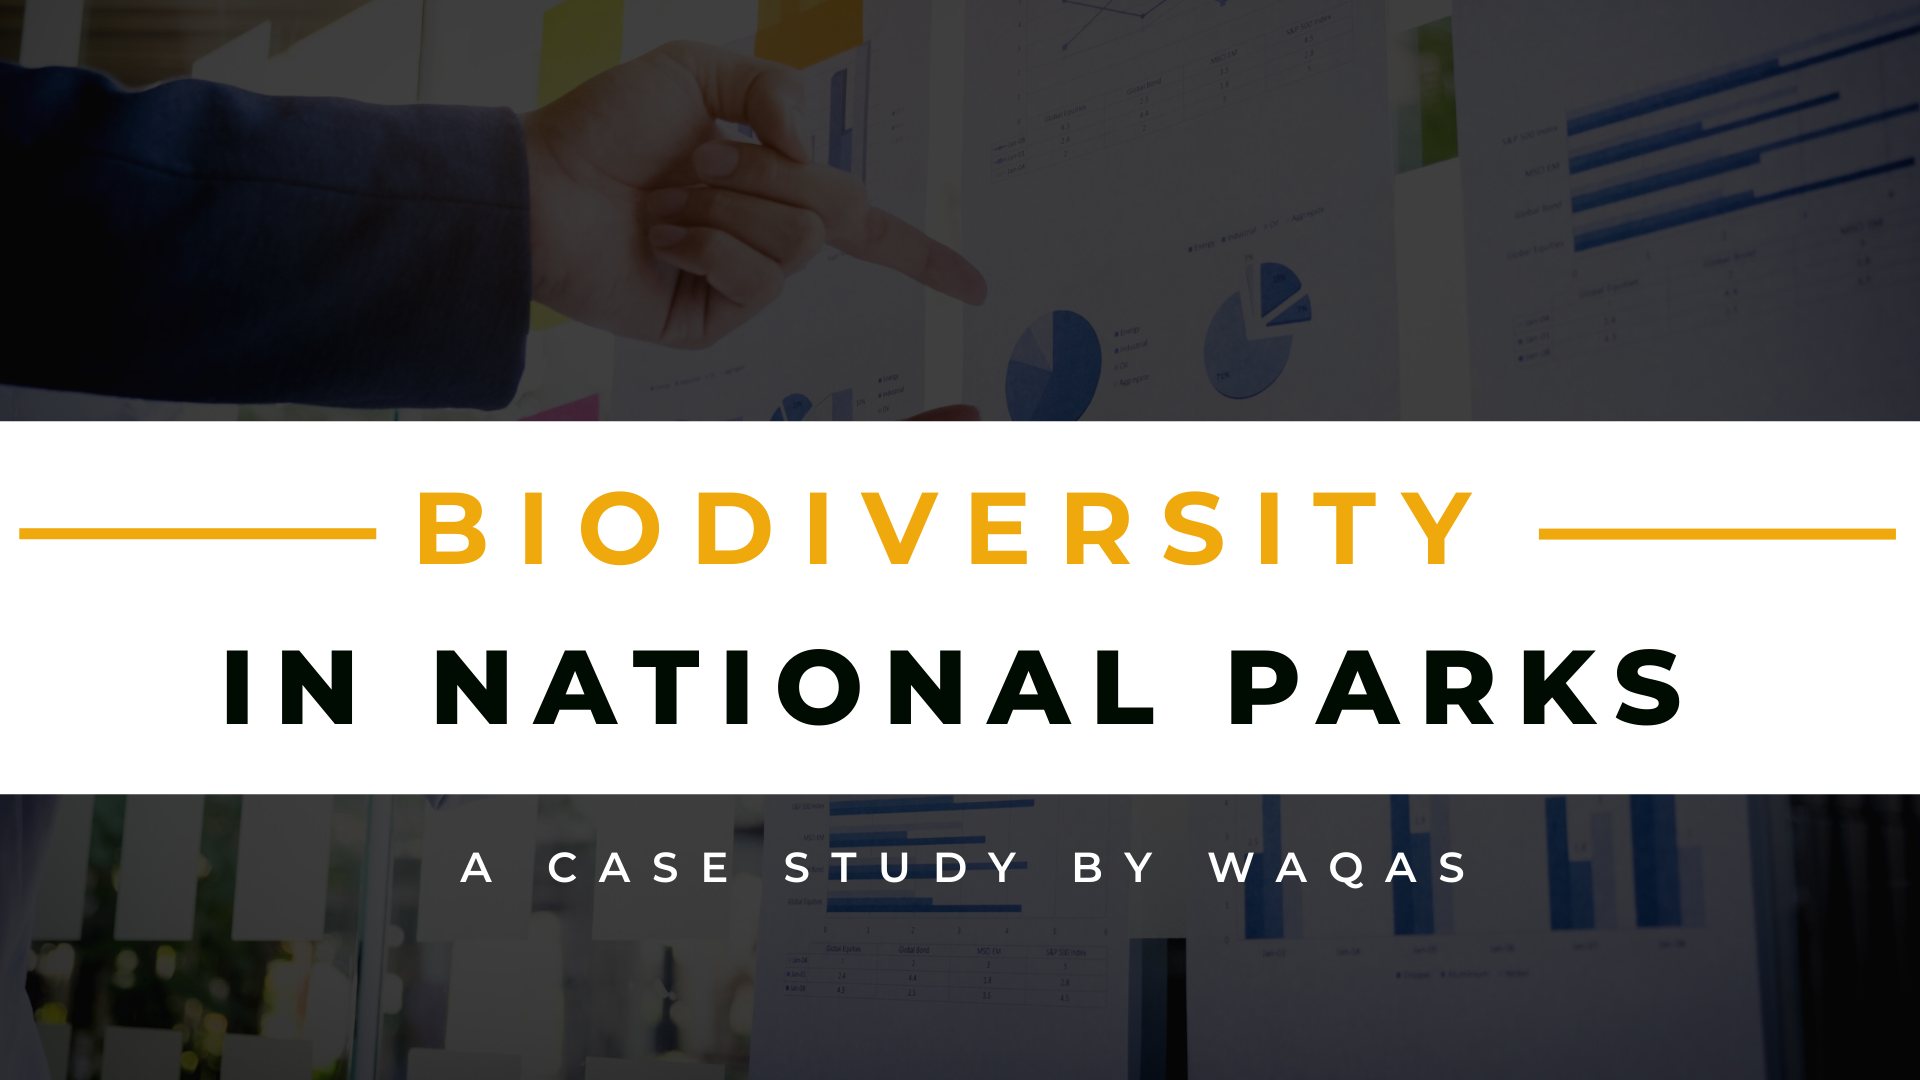

<div style='text-align: center;'>
    <h3><strong>BIODIVERSITY IN NATIONAL PARKS</strong></h3>
    <h5 style='text-align: center;'> Analyze and interpret data from the National Park Service on the status of endangered species in some of the parks</h5>
</div>
<p style="text-align: right"><i>A case study by waqas</i></p>

### Overview

The objective of this project is to conduct a comprehensive analysis of biodiversity data sourced from the National Parks Service, with a specific focus on the observation of different species across various national park locations. 

### Goal 
The National Park Service aims to protect endangered species and maintain biodiversity in their parks. As an analyst, your key tasks involve studying species characteristics, conservation status, and their connection to the parks.

### Objective
The project sets out to address several key questions, aiming to shed light on various aspects of biodiversity and conservation within the national parks

1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which animal is most prevalent and what is their distribution amongst parks?


### Key Activities

The project encompasses a range of tasks, including 
- Scoping
- Data analysis
- Data preparation
- Visualization
- Interpretation of the analysis results

#### Data sources

This project has two data sets `Observations.csv` and `Species_info.csv`. The first csv file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project.

Note: The data for this project is *inspired* by real data, but is mostly fictional.

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

To revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the objective section)


### Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the Data

To analyze species conservation status and observations in national parks:

1. Load datasets into DataFrames for analysis.
2. Read `Observations.csv` and `Species_info.csv` into DataFrames named `observations` and `species`.
3. Use `.head()` to preview the contents of the newly created DataFrames.


#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status


In [2]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [3]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Characteristics

In [4]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


- **species**:
  - Rows: 5,824
  - Columns: 4

- **observations**:
  - Rows: 23,296
  - Columns: 3


## Explore the Data

Lets find unique species in `species` data by using column `scientific_name`

In [5]:
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


*There are **5,541 unique species*** in `species` dataset

</br>

Next is to find the number of `category` that are represented in the data and there are 7 including animals and plants.

In [5]:
print(f"Number of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

Number of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


*There are **7 distinct categories**  in **`species`** dataset*

</br>


Here is a chance to drill one level deeper and see the count of `category` in the data

In [12]:
sorted_species = species.groupby("category").size().sort_values(ascending=False)
sorted_species

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
dtype: int64

***Vascular plants** are by far the **largest share** of species with 4,470 in the data with **reptiles** being the **fewest** with 79*

</br>


Lets explore **`conservation_status`** column.

In [8]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


*The column has **4 categories**, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` values.*

</br>


Breakdown of **`conservation_status`**

In [9]:
print(f"na values:{species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


Categories of conservation status and their count are
- Species without concerns (NaN values): 5,633
- Species of concern: 161
- Endangered species: 16
- Threatened species: 10
- Species in recovery: 4

Note: In most cases, handling NaN values requires careful consideration, but in this context, the absence of data signifies that these species are not under any conservation status.

</br>



#### Observations exploration

The next section looks at `observations` data. The first task is to check the number of parks

In [10]:
print(f"number of parks:{observations.park_name.nunique()}")
print(f"unique parks:{observations.park_name.unique()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


*There are only **4** national parks in the dataset*

Total number of observations logged in the parks

In [11]:
print(f"number of observations:{observations.observations.sum()}")

number of observations:3314739


*There are **3,314,739** sightings in the last 7 days... that's a lot of observations!*

## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [17]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size().sort_values(ascending= False)

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
dtype: int64

#### Conservation Categories Exploration

- Excluding species that do not require intervention, distribution of remaining species is as under:
  - Endangered: 16 species
  - In Recovery: 4 species

#### Conservation Categories by Taxonomy

- Among Endangered species:
  - Mammals: 7
  - Birds: 4

- Among species In Recovery:
  - Mammals: 1
  - Birds: 3

This suggests that among species in the "In Recovery" category, birds seem to be recovering more than mammals.


In [20]:
conservationCategory = species[species.conservation_status != "No Interventio"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
No Intervention,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


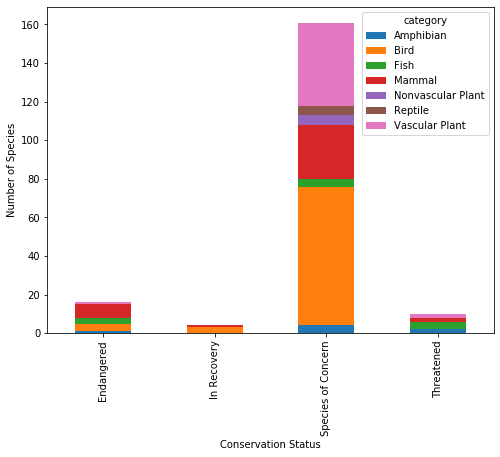

In [14]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

*Graph shows Mamamals are leading in endangered category, Birds recovery rate is highest, Birds contribute more towards the species in concern, While Fishes are most threatened*

#### In conservation

**The next question is if certain types of species are more likely to be endangered?** This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`. 

In [28]:
species['is_protected'] = species.conservation_status != 'No Intervention'

Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [30]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


</br>

Rate of protection that each **`category`** exhibits in the data

In [33]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100 

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


*From this analysis, one can see that **~17 percent** of mammals were under protection, as well as **~15 percent** of birds*

#### Statistical Significance
Lets determine whether statistical significance between conservation status rates of different species exists

- Contingency Tables: To perform chi-squared tests, contingency tables are created. These tables compare the number of protected and not protected species for different species categories. For example, the table for mammals and birds looks like this
||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

- Chi-Squared Test: The chi-squared test is applied to these contingency tables using chi2_contingency from the scipy.stats library. The test calculates a p-value, which indicates whether the observed differences in protection rates are statistically significant.

- Interpreting p-values: The p-value is a measure of how likely the observed differences are due to chance. A standard threshold for statistical significance is 0.05. If the p-value is less than 0.05, it suggests that the differences observed in the contingency table are statistically significant. If the p-value is greater than 0.05, it indicates that the differences are not statistically significant


**Mamals vs Birds**

In [18]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

=> **p valuse = 0.69**

**Mammal vs Reptiles**

The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|


In [19]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

=> **p value = 0.039**

- **Results:**
  - In the case of **mammals vs. birds**, the p-value is 0.69, which is larger than 0.05. This suggests that there is **no significant relationship** between the conservation status of mammals and birds; they are independent.
  - In the case of **mammals vs. reptiles**, the p-value is 0.039, which is below 0.05. This indicates that there is a **statistically significant difference** between the conservation status of mammals and reptiles. Mammals are shown to have a significantly higher rate of needed protection compared to reptiles.


### Species in Parks

The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names. 

In [46]:
# Import necessary modules
from itertools import chain
import string

# Define a function to remove punctuation from text
def remove_punctuations(text):
    """
    Remove punctuation characters from the input text.

    Args:
        text (str): The input text containing punctuation.

    Returns:
        str: The cleaned text with punctuation removed.
    """
    # Remove each punctuation character
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Filter the 'species' DataFrame to select only Mammal species
# Apply the 'remove_punctuations' function to clean common names and split them into lists of words
common_Names = species[species.category == "Mammal"] \
    .common_names \
    .apply(remove_punctuations) \
    .str.split().tolist()

# Display the first six lists of words from cleaned common names
common_Names[:6]


[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species.

In [45]:
# Initialize an empty list to store cleaned rows
cleanRows = []

# Loop through each item (list of words) in the 'common_Names' list
for item in common_Names:
    """
    Remove duplicates from the list of words in 'item' using a dictionary.
    
    Args:
        item (list): A list of words from the common names of mammal species.

    Returns:
        list: A list of unique words after removing duplicates.
    """
    item = list(dict.fromkeys(item))
    
    # Append the cleaned item (list of unique words) to the 'cleanRows' list
    cleanRows.append(item)

# Display the first six cleaned rows
cleanRows[:6]


[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next the words need to be collapsed into one list for easier use.

In [48]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now the data is ready to be able to count the number of occurrences of each word. From this analysis, it seems that `Bat` occurred 23 times while `Shrew` came up 18 times.

In [58]:
# Initialize an empty list to store word counts as tuples
words_counted = []

# Loop through each word in the 'res' list
for i in res:
    """
    Count the occurrences of the current word in the 'res' list.

    Args:
        i (str): The current word being counted.

    Returns:
        int: The count of occurrences of the word in the 'res' list.
    """
    x = res.count(i)
    
    # Append a tuple containing the word and its count to 'words_counted' list
    words_counted.append((i, x))

# Create a DataFrame from unique word-count pairs, sort it by count in descending order, and select the top 10
def get_top_10_words(word_count_data):
    """
    Extract and display the top 10 words with the highest counts from a DataFrame.

    Args:
        word_count_data (DataFrame): A DataFrame containing word-count pairs.

    Returns:
        DataFrame: A DataFrame with the top 10 words and their counts, sorted by count in descending order.
    """
    return word_count_data.sort_values("Count", ascending=False).head(10)

top_10_words = get_top_10_words(pd.DataFrame(set(words_counted), columns=['Word', 'Count']))
top_10_words


,Word,Count
12,Bat,23
54,Shrew,18
189,Myotis,17
22,Mouse,16
64,Chipmunk,13
190,Squirrel,12
101,American,12
58,Eastern,11
111,Vole,11
0,Mountain,10


In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [59]:
# Add a new column 'is_bat' to the 'species' DataFrame
# This column will indicate whether a species has 'Bat' in its common names

species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex=True)

# Display the first 10 rows of the modified DataFrame
species.head(10)


,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


</br>

Here is a subset of the data where `is_bat` is true, returning see the rows that matched. There seems to be a lot of species of bats and a mix of protected vs. non-protected species. 

In [51]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


</br>


Next the results of the bat species will be merged with `observations` to create a `DataFrame` with observations of bats across the four national parks.  

In [53]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


</br>

Let's see how many total bat observations(across all species) were made at each national park.  

In [62]:
bat_observations.groupby('park_name').observations.sum().reset_index().sort_values(by= 'observations', ascending = False)

,park_name,observations
2,Yellowstone National Park,8362
3,Yosemite National Park,4786
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411


Total No of Bats observed are as under
- *Yellowstone National Park seems to have the largest with 8,362 observations*
- *The Great Smoky Mountains National Park having the lowest with 2,411 observations*

</br>



Now let's see each park broken down by protected bats vs. non-protected bat sightings

In [63]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index().sort_values(by= 'observations', ascending = False)
obs_by_park

,park_name,is_protected,observations
5,Yellowstone National Park,True,4318
4,Yellowstone National Park,False,4044
7,Yosemite National Park,True,2441
6,Yosemite National Park,False,2345
1,Bryce National Park,True,1837
0,Bryce National Park,False,1596
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112


*It seems that every park except for the **Great Smoky Mountains National Park has more sightings of protected bats** than not. This could be considered a great sign for bats*

</br>


Lets plot last the data after manipulations done

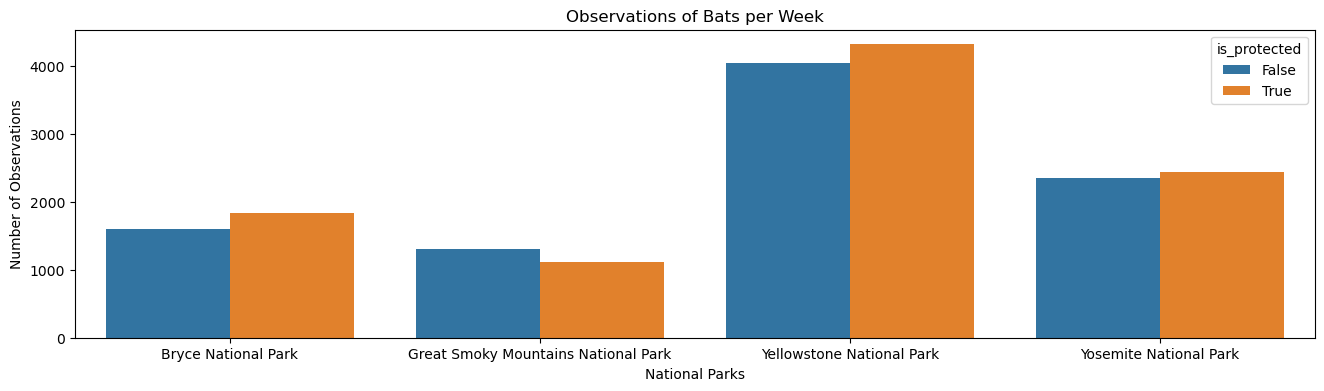

In [56]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

From this chart one can see that 
- **Yellowstone and Bryce National Parks** seem to be doing a great job with their bat populations since there are *more sightings of protected bats compared to non-protected species*
- The Great Smoky Mountains National Park might need to beef up there efforts in conservation as they have seen more non-protected species

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.


# Conclusions

The project successfully produced several data visualizations and drew meaningful inferences from the dataset encompassing species in four National Parks.

The project also addressed the initial questions posed at the beginning:

#### Distribution of Conservation Status

**Question:** What is the distribution of conservation status for species?

**Answer:** The majority of species (5,633) were not categorized under conservation, while a smaller number (191) were.

#### Endangerment by Species Type

**Question:** Are certain types of species more likely to be endangered?

**Answer:** Mammals and Birds exhibited the highest percentage of being under protection, indicating a higher likelihood of being endangered.

#### Significance of Conservation Differences

**Question:** Are the differences between species and their conservation status significant?

**Answer:** Although there was no significant difference in conservation percentages between mammals and birds, a statistically significant difference was observed between mammals and reptiles.

#### Prevalent Species and Their Park Distribution

**Question:** Which animal is most prevalent and what is their distribution amongst parks?

**Answer:** The study identified bats as the most frequently occurring species across the parks, with Yellowstone National Park being the primary location for bat sightings.

These findings contribute to a better understanding of species conservation and distribution in the studied National Parks.


## Further Research 

- This dataset exclusively contains observations from the past week, which *limits* our ability to analyze changes in conservation status over time.
- It would be intriguing to explore how the conservation status of various species evolves over an extended period.
- Additionally, the dataset lacks information about the size of each park. One might speculate that **Yellowstone National Park**, being potentially larger than the other parks, could have a more extensive array of observations and greater biodiversity.
- Lastly, if we had recorded precise locations, we could have:
  - Examined the spatial distribution of species
  - Tested for any spatial clustering among these observations.

---